IMPORT ALL THE NECESSARY LIBARY

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df=pd.read_csv("advertising.csv")

GET THE DATA INFORMATION

In [39]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [41]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [42]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [43]:
df = df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)
print(df)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                       68.95   35     61833.90                256.09     0   
1                       80.23   31     68441.85                193.77     1   
2                       69.47   26     59785.94                236.50     0   
3                       74.15   29     54806.18                245.89     1   
4                       68.37   35     73889.99                225.58     0   
..                        ...  ...          ...                   ...   ...   
995                     72.97   30     71384.57                208.58     1   
996                     51.30   45     67782.17                134.42     1   
997                     51.63   51     42415.72                120.37     1   
998                     55.55   19     41920.79                187.95     0   
999                     45.01   26     29875.80                178.35     0   

     Clicked on Ad  
0                0  
1        

In [44]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# Specify the columns to scale (numerical features)
columns_to_scale = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Male']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
data_scaled = df.copy()  # Create a copy of the original dataset
data_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled dataset
data_scaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,0
1,0.961132,-0.570425,1.002530,0.313805,1.038750,0
2,0.282083,-1.139826,0.356949,1.287589,-0.962695,0
3,0.577432,-0.798185,-0.014456,1.501580,1.038750,0
4,0.212664,-0.114905,1.408868,1.038731,-0.962695,0


In [47]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Clicked on Ad'])  # Features
y = df['Clicked on Ad']  # Target variable

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (800, 5) (800,)
Test set shape (X_test, y_test): (200, 5) (200,)


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [50]:
predictions = logmodel.predict(X_test)

In [51]:
y_pred=logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
classify=classification_report(y_test,y_pred)
print(classify)

0.9
[[85  4]
 [16 95]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



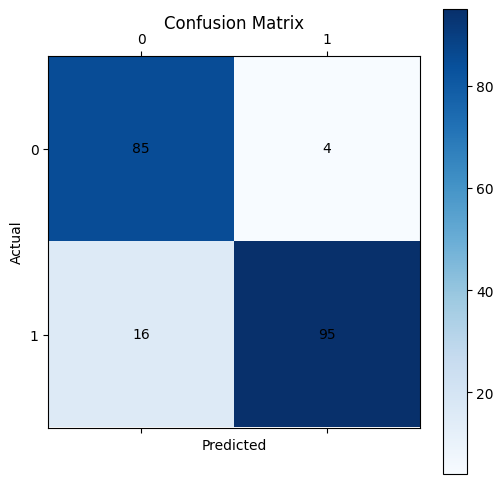

In [55]:
import numpy as np

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap='Blues', fignum=1)
plt.colorbar()
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
for (i, j), value in np.ndenumerate(cm):
    plt.text(j, i, f'{value}', ha='center', va='center')
plt.show()



WE USE RANDOM FOREST FOR COMPARING THE MODEL WITH GOOD ACCURACY

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.9675


In [59]:
# Example: New input data (replace these values with actual ones for testing)
new_input = [[75.0, 30, 60000.0, 200.0,1]]  # Example: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Male]

# Scale the new input data using the trained scaler
new_input_scaled = scaler.transform(new_input)

# Make predictions for the new input
predicted_class = logmodel.predict(new_input_scaled)  # Class prediction
predicted_probability = logmodel.predict_proba(new_input_scaled)  # Probability of each class

# Display the results
{
    "Predicted Class (0 = Not Clicked, 1 = Clicked)": int(predicted_class[0]),
    "Probability of Clicking on Ad": predicted_probability[0][1],
    "Probability of Not Clicking on Ad": predicted_probability[0][0]
}


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


{'Predicted Class (0 = Not Clicked, 1 = Clicked)': 0,
 'Probability of Clicking on Ad': 0.44541070120423354,
 'Probability of Not Clicking on Ad': 0.5545892987957665}